In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "../Cassidy_Work/MovieData_Clean.csv"
df = pd.read_csv(filepath)
print(df)

                  Movie_Title Released_Year Rating  Runtime      Genre  \
0    The Shawshank Redemption          1994      R      142      Drama   
1               The Godfather          1972      R      175      Crime   
2             The Dark Knight          2008  PG-13      152     Action   
3      The Godfather: Part II          1974      R      202      Crime   
4                12 Angry Men          1957      G       96      Crime   
..                        ...           ...    ...      ...        ...   
709              Giù la testa          1971     PG      157      Drama   
710            Kelly's Heroes          1970     PG      144  Adventure   
711           The Jungle Book          1967      G       78  Animation   
712        A Hard Day's Night          1964      G       87     Comedy   
713     From Here to Eternity          1953     PG      118      Drama   

     IMDB_Rating  Meta_score              Director           Star1  \
0            9.3        80.0        Frank

In [3]:
df.head()

,Movie_Title,Released_Year,Rating,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross,Num_Genres
0,The Shawshank Redemption,1994,R,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469,1
1,The Godfather,1972,R,175,Crime,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411,2
2,The Dark Knight,2008,PG-13,152,Action,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444,3
3,The Godfather: Part II,1974,R,202,Crime,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000,2
4,12 Angry Men,1957,G,96,Crime,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000,2


In [5]:
corrs=df.corr(numeric_only=True)
corrs

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Num_Genres
Runtime,1.000000,0.258224,-0.005718,0.213657,0.168865,0.009214
IMDB_Rating,0.258224,1.000000,0.280894,0.623142,0.125992,-0.065043
Meta_score,-0.005718,0.280894,1.000000,0.029744,-0.014801,-0.044314
No_of_Votes,0.213657,0.623142,0.029744,1.000000,0.544882,0.043171
Gross,0.168865,0.125992,-0.014801,0.544882,1.000000,0.139789
Num_Genres,0.009214,-0.065043,-0.044314,0.043171,0.139789,1.000000


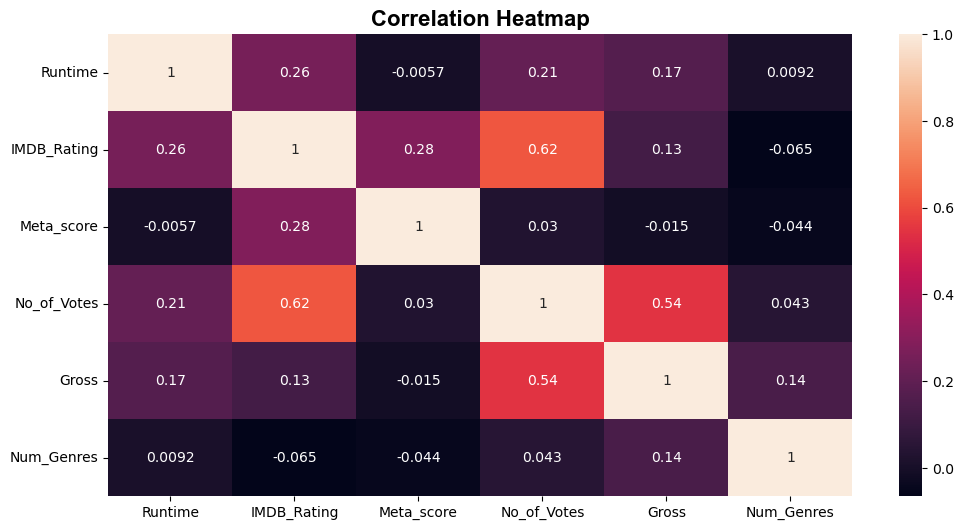

In [6]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.heatmap(corrs, annot=True)

# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()

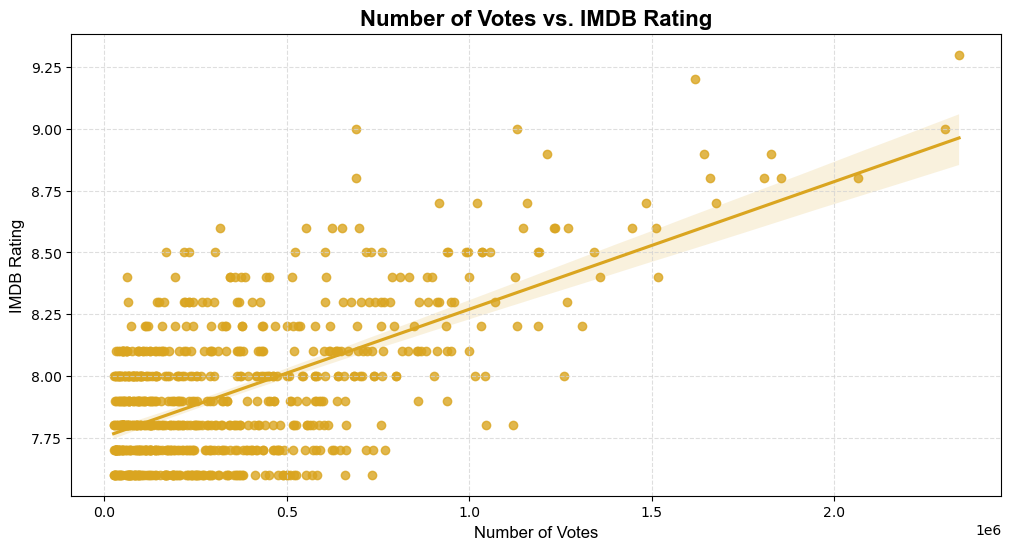

In [7]:
# make a scatter plot
# Change Canvas Size
plt.figure(figsize=(12, 6))
# Create a basic plot
sns.regplot(data=df, x="No_of_Votes", y="IMDB_Rating", scatter=True, fit_reg=True, color="goldenrod")
# Customizations
# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Number of Votes", fontfamily="Arial", fontsize=12)
plt.ylabel("IMDB Rating", fontfamily="Arial", fontsize=12)
plt.title("Number of Votes vs. IMDB Rating", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)
# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# Show/Save the Graph
plt.show()

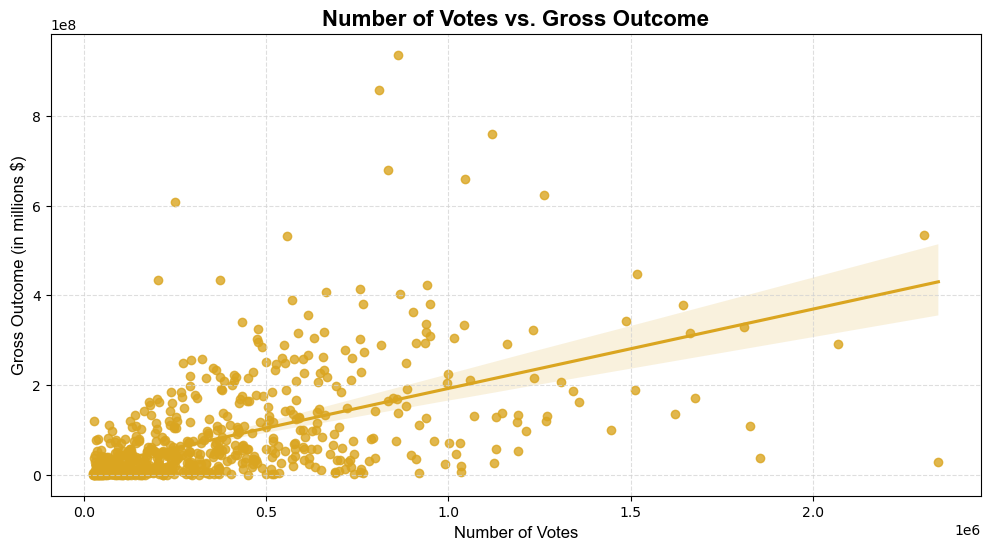

In [10]:
# make a scatter plot
# Change Canvas Size
plt.figure(figsize=(12, 6))
# Create a basic plot
sns.regplot(data=df, x="No_of_Votes", y="Gross", scatter=True, fit_reg=True, color="goldenrod")
# Customizations
# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Number of Votes", fontfamily="Arial", fontsize=12)
plt.ylabel("Gross Outcome (in millions $)", fontfamily="Arial", fontsize=12)
plt.title("Number of Votes vs. Gross Outcome", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)
# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# Show/Save the Graph
plt.show()

In [11]:
# Create the DataFrame (the dataset you provided)
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant',
              'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled',
              'The Breakfast Club', 'The Warriors'],
    'Nu_of_Votes': [1676426, 939252, 942045, 740911, 172083, 1235804, 887429, 520041, 379020, 405922, 357026, 93878],  
    'IMDB_Rating': ['8.7', '8.5', '8.5', '8.3', '8.0', '8.6', '8.3', '7.6', '7.6', '7.7', '7.8', '7.6'],  
}

df = pd.DataFrame(data)

# Convert IMDB_Rating to numeric (float)
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')

# Define a threshold for high vs low number of votes (e.g., median)
threshold = df['Nu_of_Votes'].median()

# Create two groups: High votes and Low votes based on the threshold
high_votes = df[df['Nu_of_Votes'] >= threshold]['IMDB_Rating']
low_votes = df[df['Nu_of_Votes'] < threshold]['IMDB_Rating']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(high_votes, low_votes)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in IMDB ratings between high and low votes.")
else:
    print("There is no significant difference in IMDB ratings between high and low votes.")

T-statistic: 8.288624656799172
P-value: 8.621018629381779e-06
There is a significant difference in IMDB ratings between high and low votes.
